<a href="https://www.kaggle.com/code/metin2/deep-learning-e-itim-serisi?scriptVersionId=189296579" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 01 Deep Learning 

In [1]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/_FP_nZS9GFE?si=M4QL-jntr2c1_kqD" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

# 02 | Nöron Nedir?

In [2]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/pZ1xpVVyQ_g?si=t7XsbgZoJwOSTLou" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

# 03 | Nöron Nedir?

In [3]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/runcNsmOhcQ?si=N78LNGTuFTB1qg0V" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

In [4]:
%%HTML
<iframe src="https://docs.google.com/presentation/d/e/2PACX-1vTvc4mHVmiREUuEdkGUOZj-W2-9k1I4-TG-wrletKlJVs8fYeks-hpZ5n9DI3vmU_SyLbDzhCdKl4tY/embed?start=false&loop=false&delayms=3000" frameborder="0" width="960" height="569" allowfullscreen="true" mozallowfullscreen="true" webkitallowfullscreen="true"></iframe>

<https://www.youtube.com/watch?v=NwjjLAkHoxc&list=PLanC6OPLYlCbRzzzUQWz673NiWI-oi8D2&index=7>

In [5]:
import tensorflow as tf
print('CPU',tf.reduce_sum(tf.random.normal([1000, 1000])))
print('GPU',tf.config.list_physical_devices('GPU'))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


CPU tf.Tensor(755.3245, shape=(), dtype=float32)
GPU [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
print('CPU',tf.reduce_sum(tf.random.normal([1000, 1000])))
print('GPU',tf.config.list_physical_devices('GPU'))

CPU tf.Tensor(111.28221, shape=(), dtype=float32)
GPU [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# 04 | Derin Öğrenme Nasıl ?

In [7]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/Uhu3Xw6_9q4?si=qfhIhVkiDVDMSnCM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

# 05 | El Yazısı Rakamların Sınıflandırılması İçin Sinir Ağı

![image](https://i.imgur.com/2wZSNs6.png)
![image](https://i.imgur.com/YcPdHqU.jpeg)
![image](https://i.imgur.com/Nu3oZZJ.png)
![image](https://i.imgur.com/pixKSyY.jpeg)

In [8]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [9]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [10]:
len(X_train)

60000

In [11]:
len(X_test)

10000

In [12]:
X_train[0].shape

(28, 28)

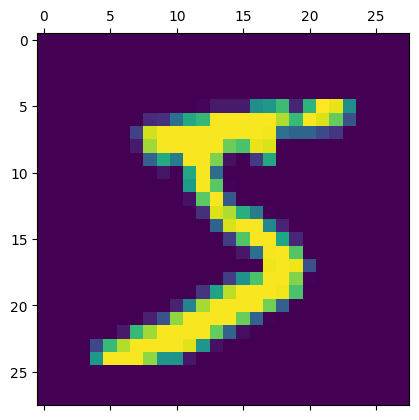

In [13]:
plt.matshow(X_train[0])

In [14]:
y_train[0]

5

In [15]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
# rescale
X_train = X_train/255
X_test = X_test/255


In [18]:
# 600,784
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


In [19]:
model = tf.keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4697 - accuracy: 0.8786
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3035 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2831 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2726 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9253


In [20]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2697 - accuracy: 0.9246


[0.26970458030700684, 0.9246000051498413]

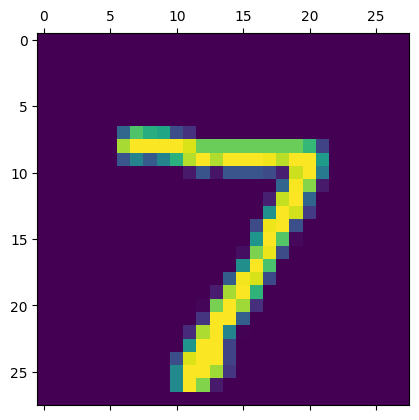

In [21]:
plt.matshow(X_test[0])

In [22]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.0285644e-02, 2.6795709e-07, 8.8589542e-02, 9.6907198e-01,
       3.7983782e-03, 1.3254957e-01, 1.6116904e-06, 9.9971265e-01,
       9.2439421e-02, 7.0360500e-01], dtype=float32)

In [23]:
np.argmax(y_predicted[0])

7

In [24]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [25]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   7,    7,  934,   18,    9,    3,   13,    9,   28,    4],
       [   4,    0,   20,  927,    1,   24,    2,    9,   15,    8],
       [   2,    1,    4,    1,  929,    0,    9,    3,    7,   26],
       [  10,    3,    3,   36,   10,  774,   20,    4,   25,    7],
       [  13,    3,    6,    1,    8,   10,  914,    2,    1,    0],
       [   1,    5,   25,    6,    9,    1,    0,  943,    2,   36],
       [   9,    9,   10,   37,   10,   34,    9,   10,  836,   10],
       [  11,    7,    1,   13,   36,    6,    0,   20,    4,  911]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

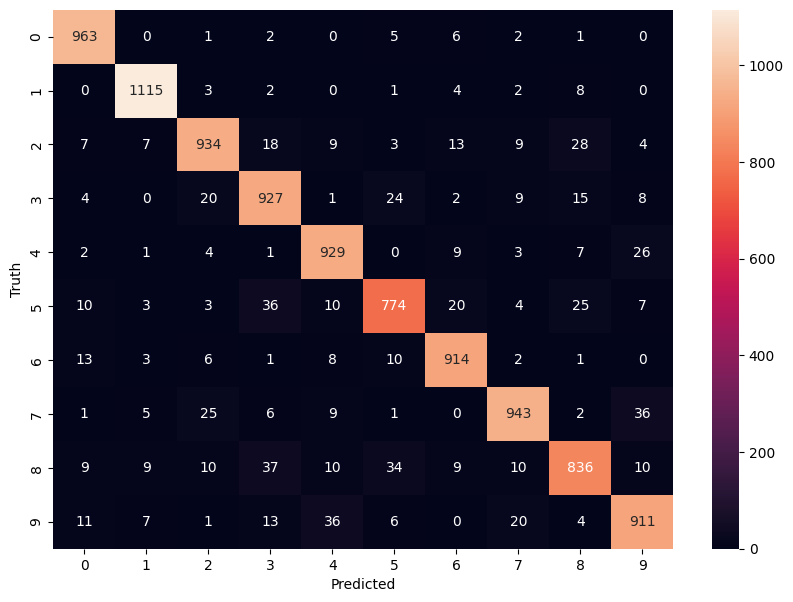

In [26]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Hidden Layer

In [27]:
model = tf.keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')

])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2724 - accuracy: 0.9214
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1248 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0886 - accuracy: 0.9729
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0676 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0531 - accuracy: 0.9836


In [28]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0898 - accuracy: 0.9713


[0.08984054625034332, 0.9713000059127808]

## Keras Flatten

In [29]:
model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')

])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2657 - accuracy: 0.9244
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1189 - accuracy: 0.9651
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0850 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0651 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0506 - accuracy: 0.9841


In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0761 - accuracy: 0.9759


[0.0761340856552124, 0.9758999943733215]